In [2]:
import laspy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from colorspacious import cspace_converter
import matplotlib as mpl
import scipy 
import seaborn as sns

from pathlib import Path

base_path = Path('.')
list(base_path.glob('T*'))

file_name = "220829GO15D"
#change file name according to flight being analysed

base_dir = "C:/Hobbies/programming/data/"
#file_path = base_dir + file_name + '/' + file_name + "_C_A.las"
#use file_path below for multiple flights on one date and adjust carefully
file_path = "C:/Hobbies/programming/data/220829GO15D/22GOrefilled/" + file_name + "_refilled_C.las"


In [3]:
def difference_file_name(tag1, tag2):
    return "height_differences_" + tag1 + "_" + tag2 + "_" + datasetname + ".csv"

In [4]:
#all files decimated into a 5cm2 grid
datasets_05 = dict(
    file_220829_e = pd.read_csv("220829GO15D_EMPTY_C_decimated_0.05.csv"),
    file_220829_r = pd.read_csv("220829GO15D_refilled_C_decimated_0.05.csv"),
    file_220905 = pd.read_csv("220905GO15D_C_decimated_0.05.csv"),
    file_220912 = pd.read_csv("220912GO15D_C_decimated_0.05.csv"),
    file_220912_50 = pd.read_csv("220912GO50D_C_decimated_0.05.csv"),
    file_220927_3MS = pd.read_csv("220927GO15D3MS_C_decimated_0.05.csv"),
    file_220927_4MS = pd.read_csv("220927GO15D4MS_C_decimated_0.05.csv"),
    file_221011 = pd.read_csv("221011GO15D_C_decimated_0.05.csv"),
    file_221020 = pd.read_csv("221020GO15D_C_decimated_0.05.csv"),
    file_221020_60 = pd.read_csv("221020GO60D_C_decimated_0.05.csv"),
    file_221101 = pd.read_csv("221101GO15D_C_decimated_0.05.csv"),
    file_221117 = pd.read_csv("221117GO15D_C_decimated_0.05.csv"),
    file_221128 = pd.read_csv("221128GO15D_C_decimated_0.05.csv"),
    file_230119 = pd.read_csv("230119GO15D_C_decimated_0.05.csv"))
      

In [5]:
#all files decimated into a 10cm2 grid
datasets_1 = dict(
    file_220829_e = pd.read_csv("220829GO15D_EMPTY_C_decimated_0.1.csv"),
    file_220829_r = pd.read_csv("220829GO15D_refilled_C_decimated_0.1.csv"),
    file_220905 = pd.read_csv("220905GO15D_C_decimated_0.1.csv"),
    file_220912 = pd.read_csv("220912GO15D_C_decimated_0.1.csv"),
    file_220912_50 = pd.read_csv("220912GO50D_C_decimated_0.1.csv"),
    file_220927_3MS = pd.read_csv("220927GO15D3MS_C_decimated_0.1.csv"),
    file_220927_4MS = pd.read_csv("220927GO15D4MS_C_decimated_0.1.csv"),
    file_221011 = pd.read_csv("221011GO15D_C_decimated_0.1.csv"),
    file_221020 = pd.read_csv("221020GO15D_C_decimated_0.1.csv"),
    file_221020_60 = pd.read_csv("221020GO60D_C_decimated_0.1.csv"),
    file_221101 = pd.read_csv("221101GO15D_C_decimated_0.1.csv"),
    file_221117 = pd.read_csv("221117GO15D_C_decimated_0.1.csv"),
    file_221128 = pd.read_csv("221128GO15D_C_decimated_0.1.csv"),
    file_230119 = pd.read_csv("230119GO15D_C_decimated_0.1.csv"))

In [6]:
file1 = "file_220829_r"
file2 = "file_220829_e"
datasetname = "datasets_1"
dataset = eval(datasetname)

zdiff = pd.read_csv(difference_file_name(file1, file2))

grid = zdiff.reset_index().pivot_table(columns='x', index='y', values='z')

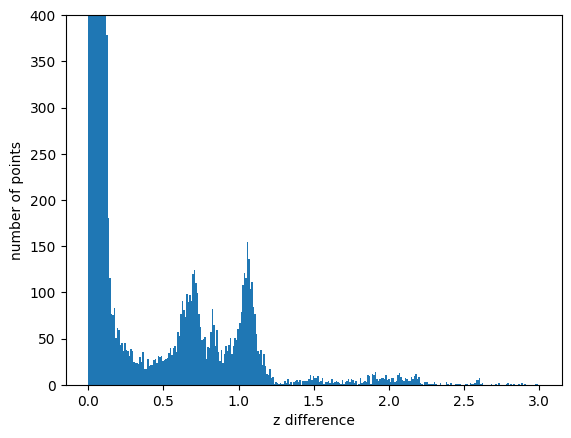

In [6]:
plt.hist(grid.values.flatten(), bins= np.linspace(0, 3, 300))
plt.xlabel('z difference')
plt.ylabel('number of points')
plt.ylim(0, 400)

Path('figures').mkdir(exist_ok = True)
#plt.savefig("figures/grave_boundaries_z_diff_datasets_1.png")

In [300]:
grid.values[~np.isnan(grid.values)]

array([-0.074, -0.033,  0.053, ..., -2.872, -2.861, -2.64 ])

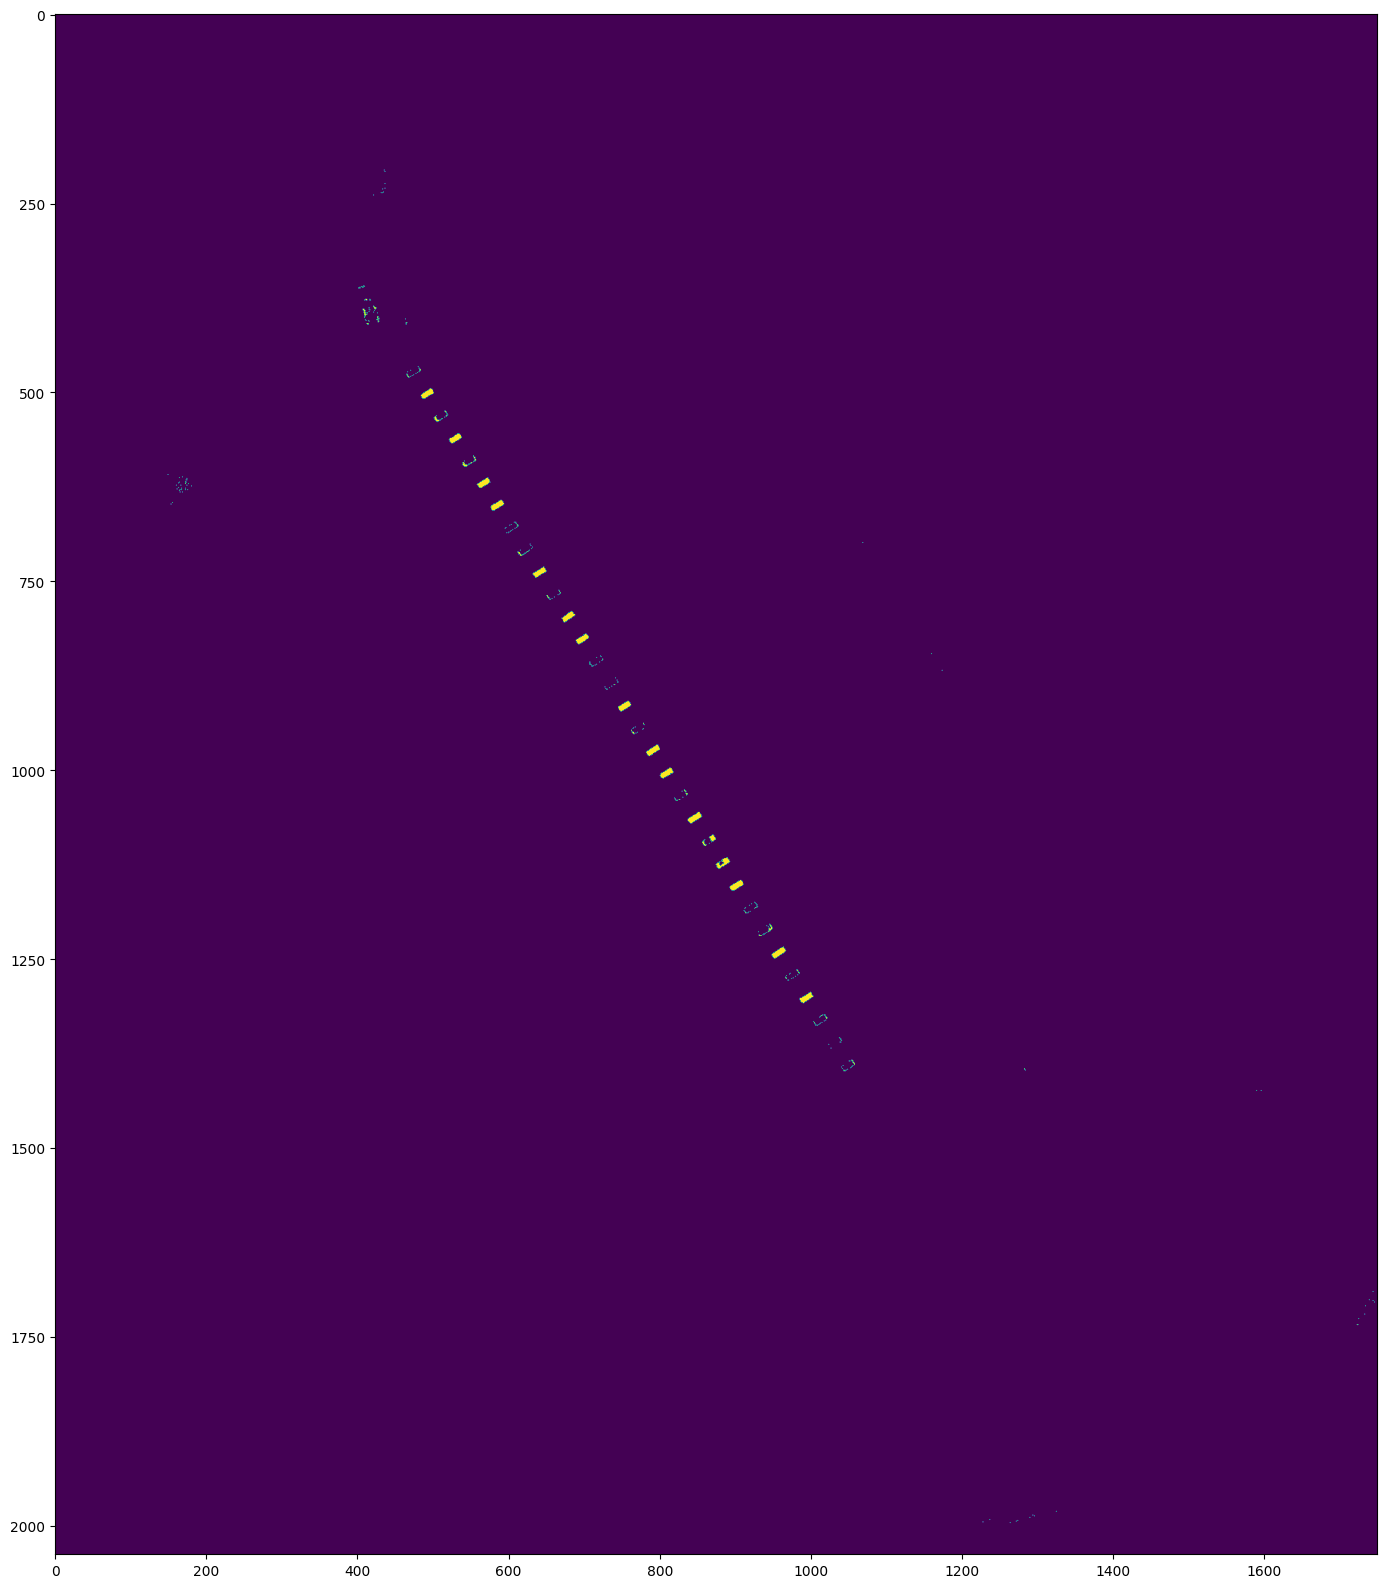

In [7]:
plt.figure(figsize = (20,20))
plt.imshow((grid.values > 0.45) & (grid.values < 0.9))


Text(220.72222222222223, 0.5, 'y grid coordinate')

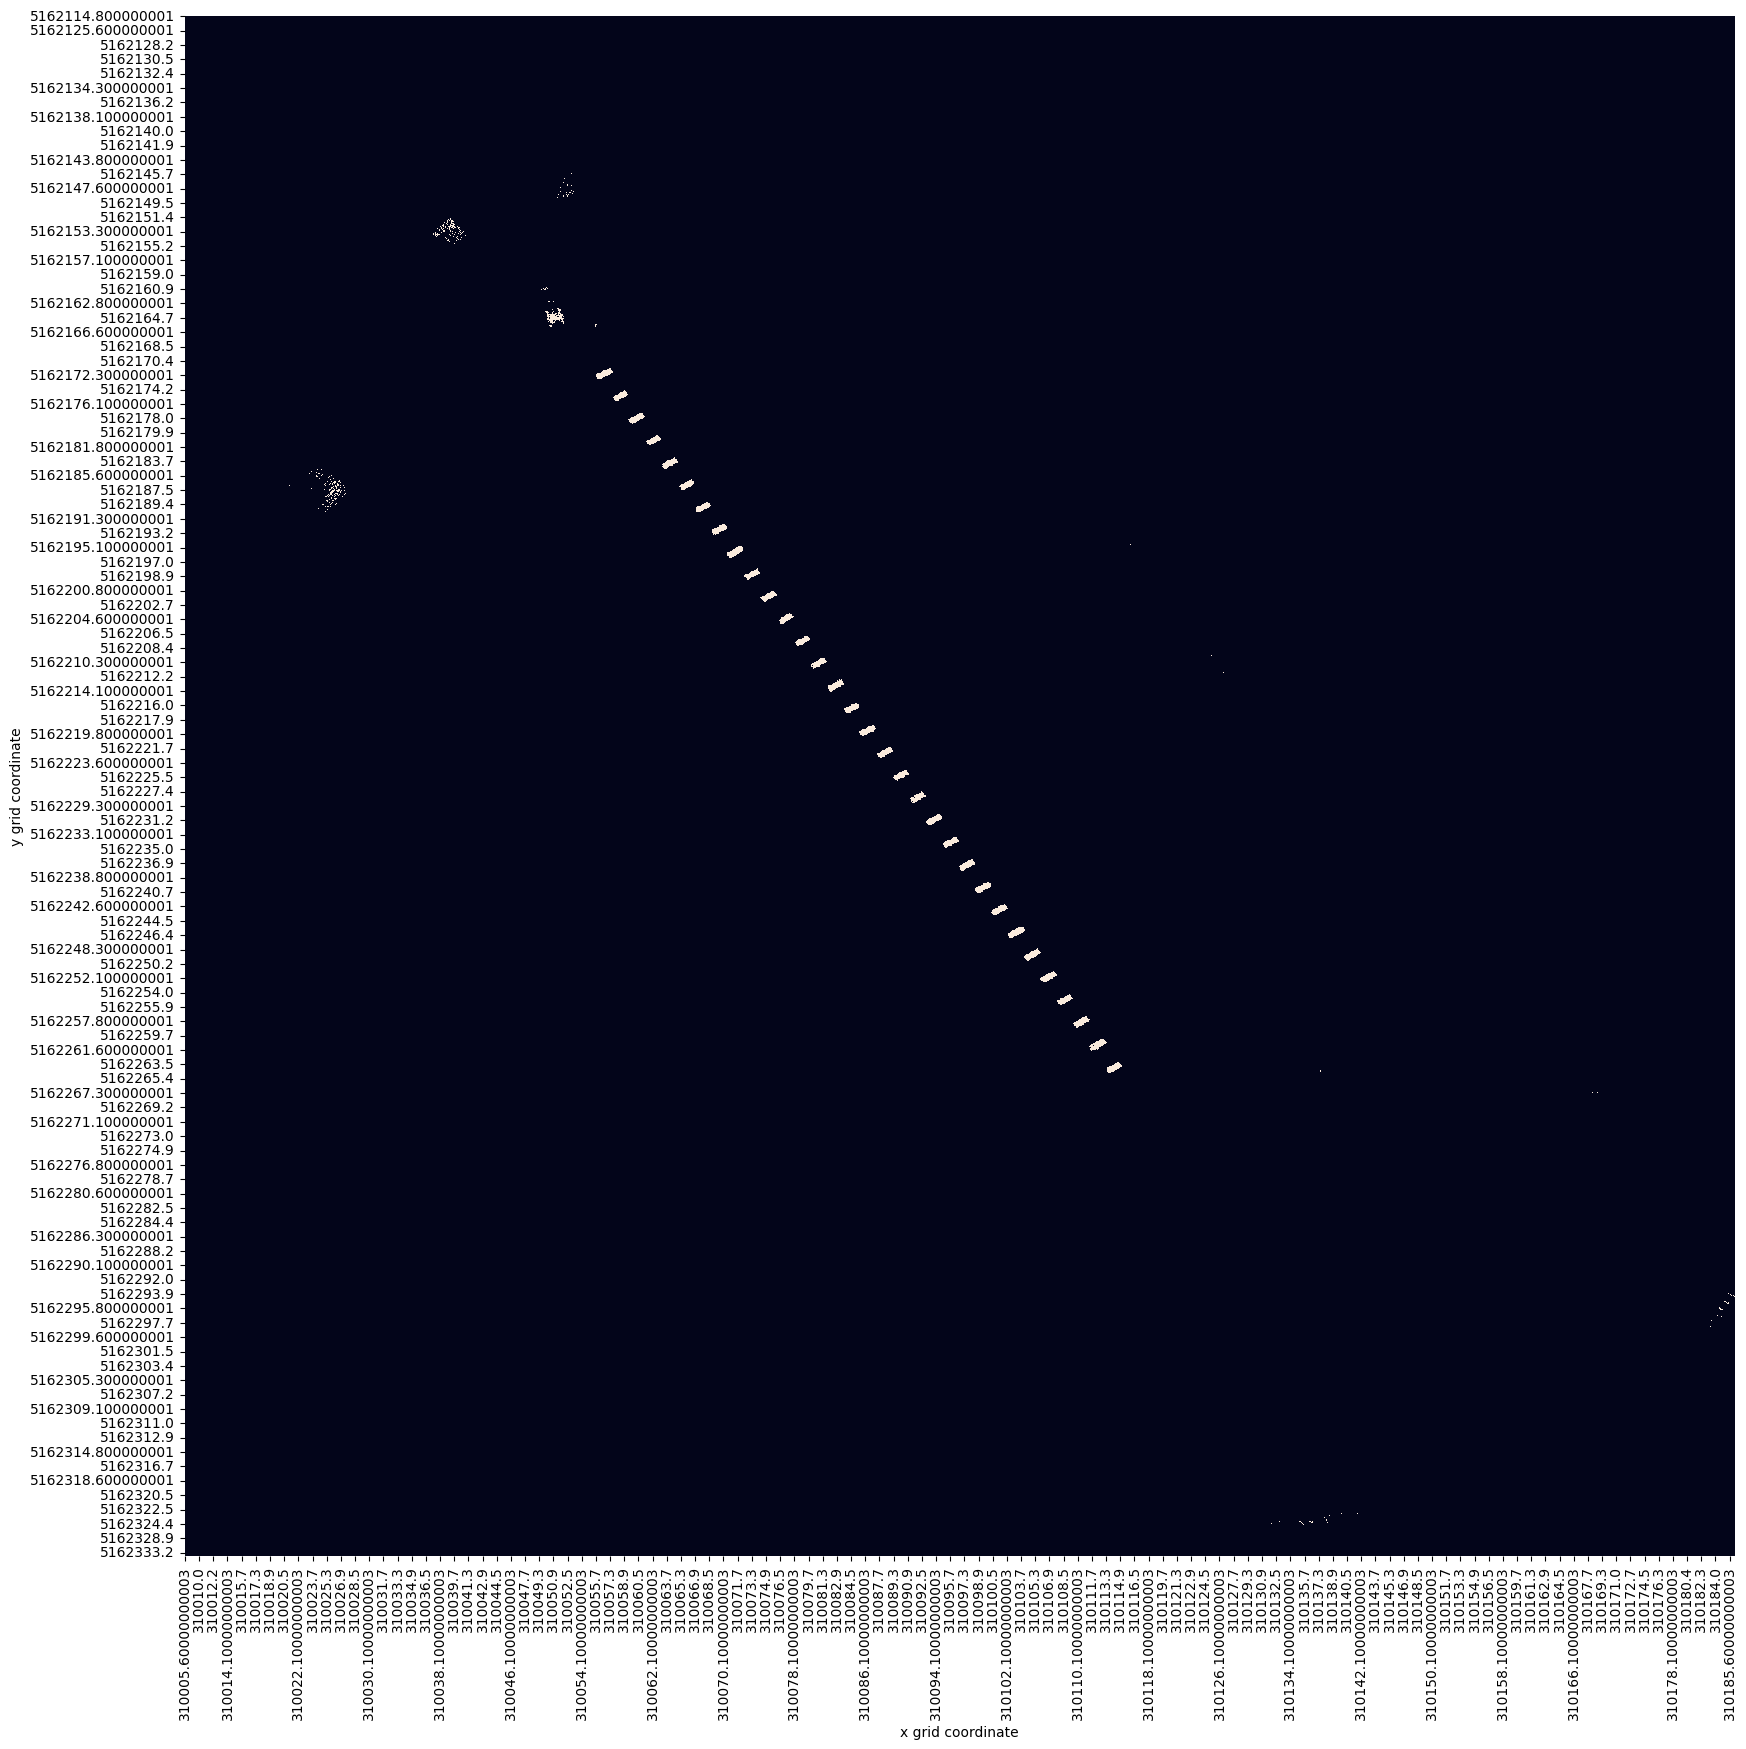

In [8]:
plt.figure(figsize = (20,20))
#plt.imshow(grid.values > 0.45, extent = [grid.columns.min(), grid.index.min(), grid.columns.max(), grid.index.max()])
sns.heatmap(grid>0.45, cbar = False)
plt.xlabel('x grid coordinate')
plt.ylabel('y grid coordinate')
#plt.savefig('figures/grave_boundaries_heat_map_z_diff_datasets_05.png')

#remove heat map bar and add axis labels

In [7]:
#extract the points that constitute graves based on height changes between empty graves on burial day and 2 weeks later.

grave_points = grid > 0.45
print(grave_points)
#grave_points.to_csv("grave_points_all.csv")

x          310005.6  310006.8  310007.4  310007.5  310007.6  310007.8   
y                                                                       
5162114.8     False     False     False     False     False     False  \
5162115.5     False     False     False     False     False     False   
5162116.0     False     False     False     False     False     False   
5162117.1     False     False     False     False     False     False   
5162121.5     False     False     False     False     False     False   
...             ...       ...       ...       ...       ...       ...   
5162333.2     False     False     False     False     False     False   
5162333.3     False     False     False     False     False     False   
5162333.6     False     False     False     False     False     False   
5162334.3     False     False     False     False     False     False   
5162334.7     False     False     False     False     False     False   

x          310007.9  310008.6  310008.8  310009.0 

In [8]:
#separate the points into individual graves and save all these tables individually
grave_true = grave_points.melt(ignore_index = False).reset_index()
grave_true = grave_true[(grave_true['x'] > (310055.3)) & (grave_true['x'] < (310115.3))]
grave_true = grave_true[grave_true['value']]
print(grave_true)
#grave_trim = 

#I think the multiplication value needs to be different for dataset_1


                 y         x  value
943997   5162165.1  310055.6   True
946040   5162165.6  310055.7   True
946041   5162165.7  310055.7   True
946042   5162165.8  310055.7   True
948078   5162165.6  310055.8   True
...            ...       ...    ...
2153517  5162263.7  310114.9   True
2153518  5162263.8  310114.9   True
2155554  5162263.6  310115.0   True
2155555  5162263.7  310115.0   True
2155556  5162263.8  310115.0   True

[4336 rows x 3 columns]


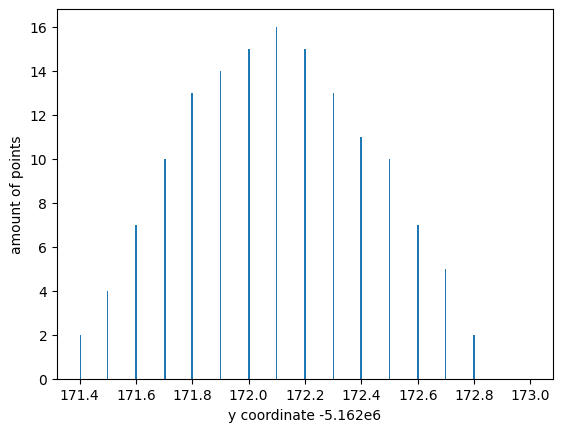

In [11]:
plt.hist(grave_true['y']-5.162e6, bins = np.linspace(171.4,173,300))
plt.xlabel('y coordinate -5.162e6')
plt.ylabel('amount of points')
#plt.hist(grave_true['y']-5.162e6, bins =300)
plt.show()

Text(0, 0.5, 'amount of points')

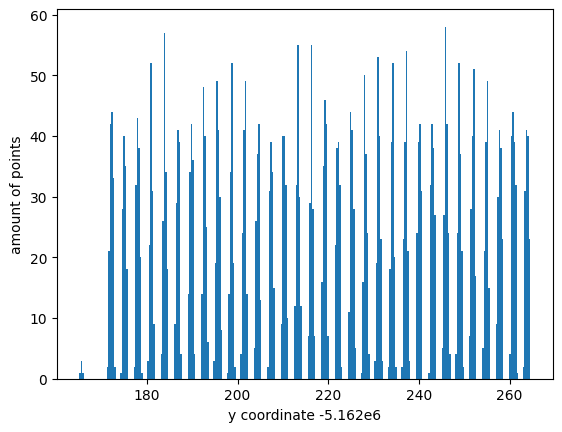

In [12]:
plt.hist(grave_true['y']-5.162e6, bins =300)
plt.xlabel('y coordinate -5.162e6')
plt.ylabel('amount of points')
#plt.savefig('figures/grave_boundaries_individual_graves.png')

                 y         x  value
2120913  5162264.1  310113.3   True
2122950  5162264.0  310113.4   True
2122951  5162264.1  310113.4   True
2122952  5162264.2  310113.4   True
2122953  5162264.3  310113.4   True
...            ...       ...    ...
2153517  5162263.7  310114.9   True
2153518  5162263.8  310114.9   True
2155554  5162263.6  310115.0   True
2155555  5162263.7  310115.0   True
2155556  5162263.8  310115.0   True

[137 rows x 3 columns]


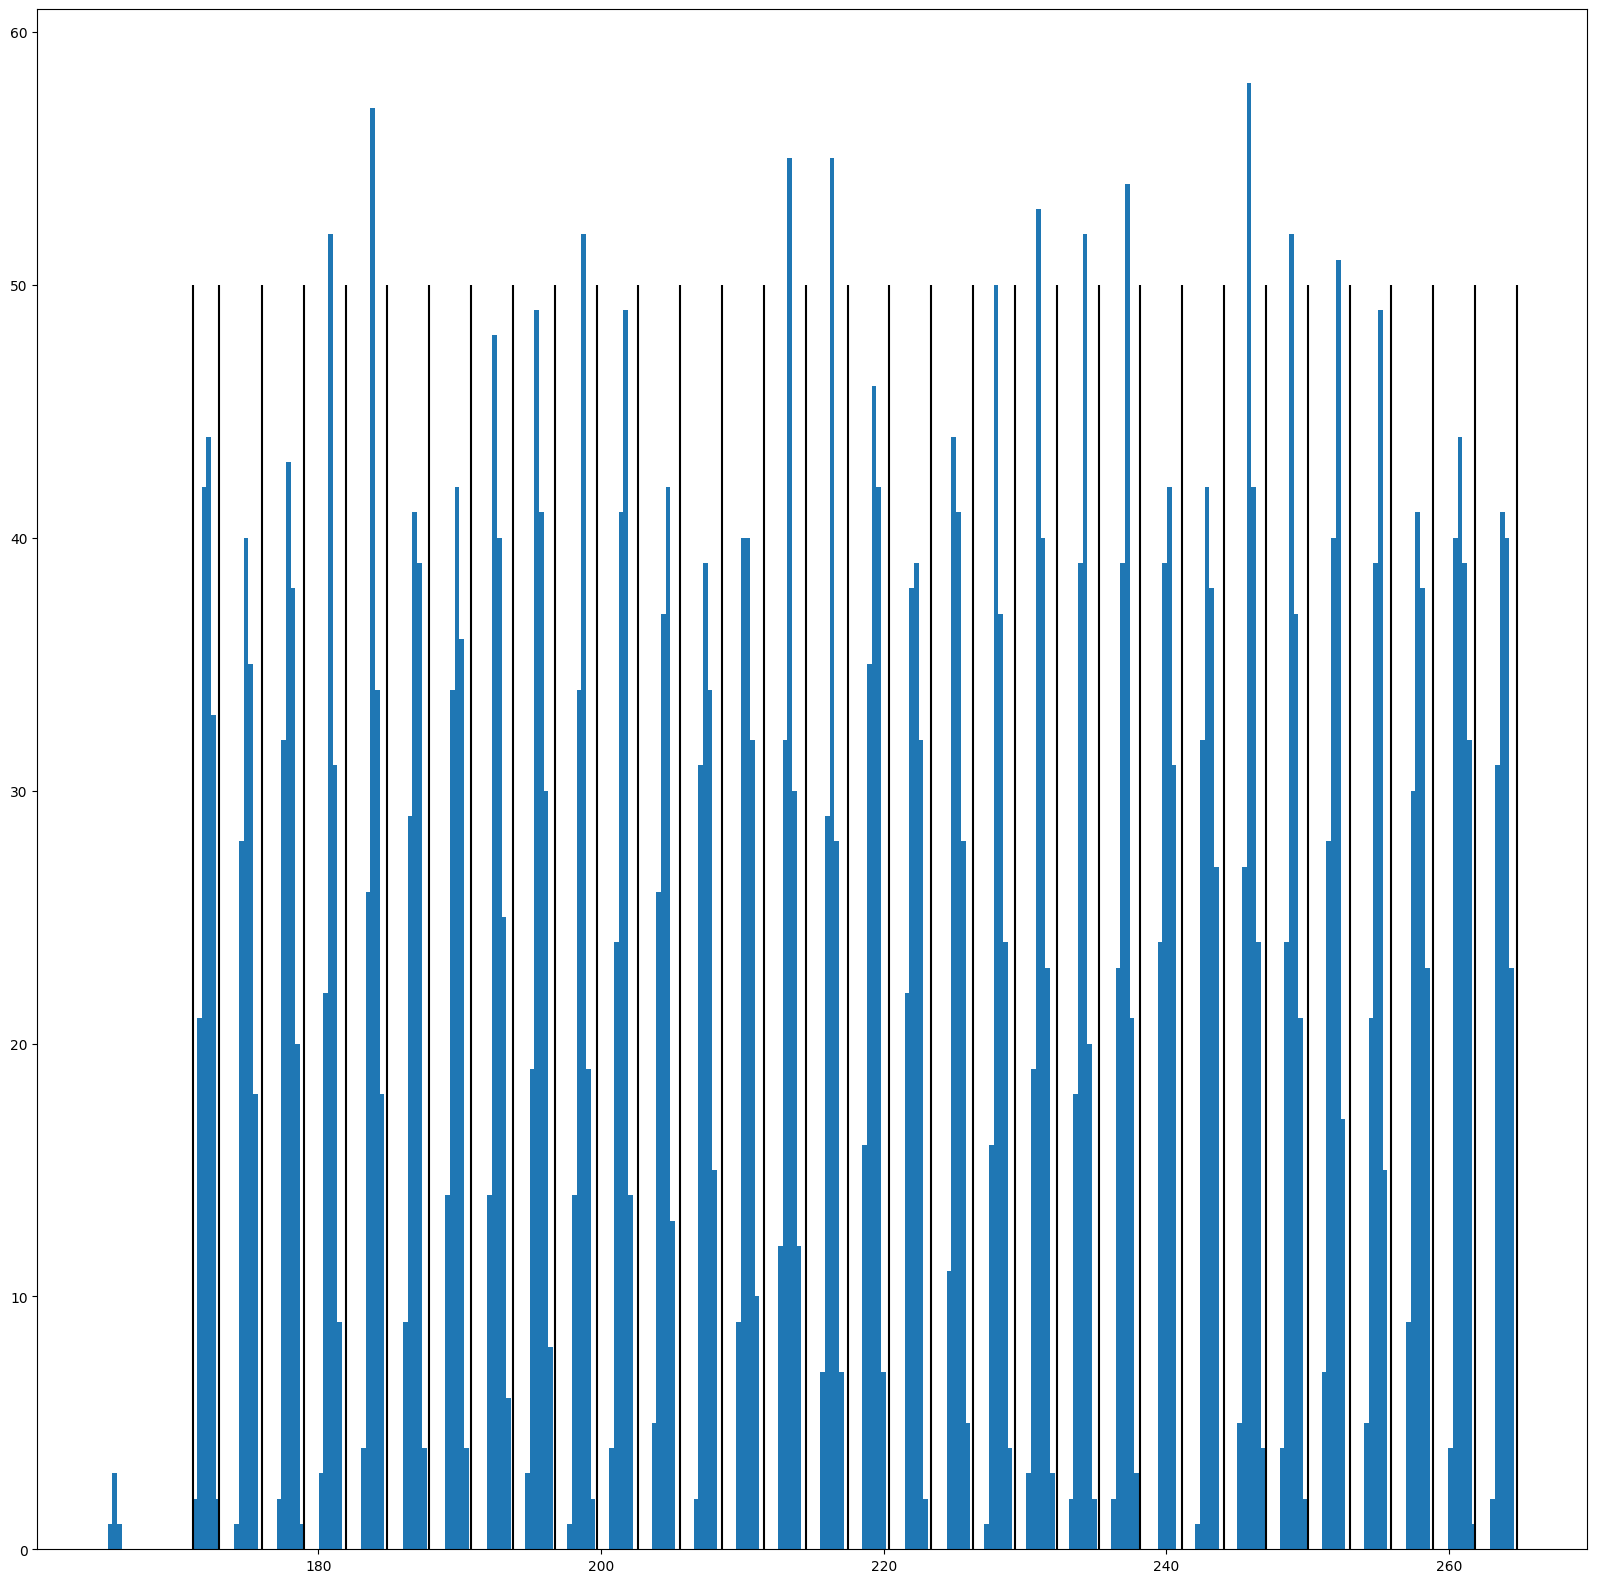

In [10]:

graves = {}

num_graves = 32

bottom = 171.1+5.162e6
top = 173+5.162e6
splits = [bottom]
for i in range(1, num_graves+1):
    graves[f'T{i:02d}'] = grave_true[(grave_true['y'] > bottom) & (grave_true['y'] < top)]
    splits.append(top)
    bottom = bottom + 2.96
    top = bottom + 1.95

print(graves['T32'])
plt.figure(figsize=(20, 20))
plt.hist(grave_true['y']-5.162e6, bins = 300)
plt.vlines(np.array(splits) -5.162e6 , ymin=0, ymax=50, color='k')
plt.show()
#best guess is +2.95 +1.95   

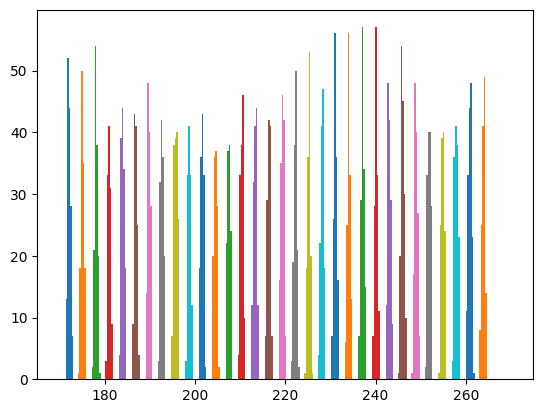

In [11]:
for name, value in graves.items():
    #if len(value) == 0:
        #continue
    plt.hist(value['y'].values - 5.162e6, bins = np.linspace(170, 270, 300))


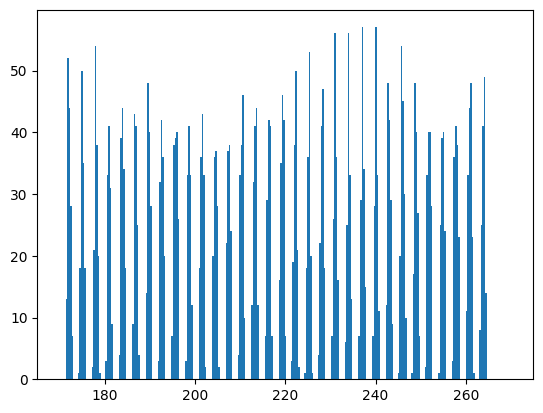

In [410]:
plt.hist(grave_true['y'].values-5.162e6, bins =np.linspace(170, 270, 300))
#plt.hist(grave_true['y'].values-5.162e6, bins = 300)
plt.show()

In [411]:
pd.testing.assert_frame_equal(
    pd.concat(graves.values()).sort_index(),
    grave_true[(grave_true['y'] - 5.162e6) > 170 ].sort_index())

(4282, 3)

In [12]:
for name, value in graves.items():
    value = value.drop(columns = ['value'])
    value.to_csv(name +'/grave_points' + "_" + datasetname + ".csv", index = False)

In [14]:
#takes a decimated flight file, cuts it into different files for different graves, 
#and places these files into the folder of each respective grave.
datasetname = "datasets_05"
dataset = eval(datasetname)


print(grave_true)
for flight in dataset:
    flight_indexed_by_grid = dataset[flight].set_index(['y', 'x'], drop = True)
    for name in base_path.glob('T*'):
        this_grave = pd.read_csv(name / ("grave_points_" + datasetname + ".csv"))
        ids = this_grave.set_index(['y', 'x']).index.intersection(flight_indexed_by_grid.index)
        tomb_points = flight_indexed_by_grid.loc[ids]
        tomb_points.to_csv(str(name) + '/' + flight + '_' + name.name + "_" + datasetname + '.csv')


                 y         x  value
943997   5162165.1  310055.6   True
946040   5162165.6  310055.7   True
946041   5162165.7  310055.7   True
946042   5162165.8  310055.7   True
948078   5162165.6  310055.8   True
...            ...       ...    ...
2153517  5162263.7  310114.9   True
2153518  5162263.8  310114.9   True
2155554  5162263.6  310115.0   True
2155555  5162263.7  310115.0   True
2155556  5162263.8  310115.0   True

[4336 rows x 3 columns]


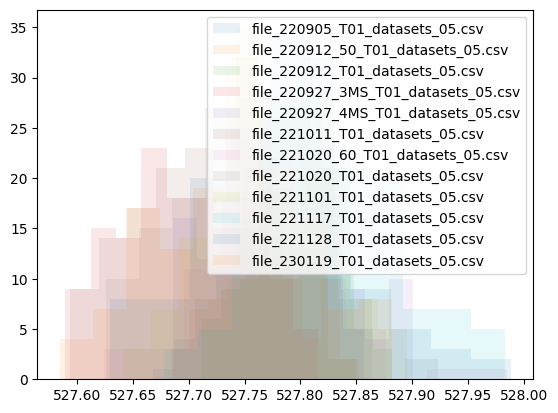

In [55]:
#Histogram comparing the frequency of Z values of one specified grave for all processed flights.

Tomb = Path('C:\Hobbies\programming\T01')
Flight_files = Tomb.glob('file_*_05.csv')
for Flight_file in Flight_files: 
    if 'file_220829' in Flight_file.name: 
        continue
    dataset = pd.read_csv(Flight_file)
    plt.hist(dataset['z'], label = Flight_file.name, alpha = 0.1)
    #plt.show()
    
plt.legend()